In [1]:
# Import relevant packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
os.getcwd()

'C:\\Users\\robur\\Documents\\Thesis\\code\\lcfMapping'

In [3]:
# Read in excel files
pred2015 = pd.read_csv("../data/output/wurChange/predictions-2015-ndvi-median.csv")
pred2016 = pd.read_csv("../data/output/wurChange/predictions-2016-ndvi-median.csv")
pred2017 = pd.read_csv("../data/output/wurChange/predictions-2017-ndvi-median.csv")
pred2018 = pd.read_csv("../data/output/wurChange/predictions-2018-ndvi-median.csv")
classes = list(pred2015.columns)

pred2015

,tree,shrub,grassland,crops,urban_built_up,bare,water
0,0.000000,3.571429,96.428571,0.000000,0.0,0.000000,0.000000
1,61.764706,0.000000,38.235294,0.000000,0.0,0.000000,0.000000
2,0.000000,17.142857,65.714286,0.000000,0.0,17.142857,0.000000
3,0.000000,63.636364,9.090909,0.000000,0.0,27.272727,0.000000
4,34.285714,5.714286,60.000000,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...
30484,100.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
30485,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,100.000000
30486,0.000000,0.000000,1.369863,0.000000,0.0,0.000000,98.630137
30487,0.000000,0.000000,100.000000,0.000000,0.0,0.000000,0.000000


In [4]:
for i in range(len(classes)):
    print(classes[i])

tree
shrub
grassland
crops
urban_built_up
bare
water


In [5]:
print("2015:", pred2015["tree"][1])
print("2016:", pred2016["tree"][1])
print("2017:", pred2017["tree"][1])
print("2018:", pred2018["tree"][1])

2015: 61.7647058823529
2016: 51.6129032258064
2017: 20.0
2018: 20.0


In [6]:
tree = pd.concat([pred2015["tree"],pred2016["tree"],pred2017["tree"],pred2018["tree"]], axis=1)
tree.columns = ['2015', '2016', '2017', '2018']
tree = tree.iloc[1]
tree

2015    61.764706
2016    51.612903
2017    20.000000
2018    20.000000
Name: 1, dtype: float64

In [32]:
print(pred2015.iloc[0][1])
print(pred2016.iloc[0][1])
print(pred2017.iloc[0][1])
print(pred2018.iloc[0][1])

print(pred2015.iloc[0])

3.57142857142857
3.73831775700935
4.51127819548872
4.28571428571429
tree               0.000000
shrub              3.571429
grassland         96.428571
crops              0.000000
urban_built_up     0.000000
bare               0.000000
water              0.000000
Name: 0, dtype: float64


In [ ]:
## Start of Markov chain building

In [20]:
rf2015 = tree[0]
rf2016 = tree[1]
rf2017 = tree[2]
rf2018 = tree[3]

In [ ]:
## Code concept

# Concept for class tree for 1st point
"""
for n times:
    2015
        optimise
    2016
        optimise
    2017
        optimise
    2018
        optimise
"""

# Concept of all code
"""
for 1:30.000 points
    
    for 1:7 classes:
        
        for n times:
            2015
                optimise
            2016
                optimise
            2017
                optimise
            2018
                optimise
"""

# Concept of all code with params
"""
pred2015
pred2016
pred2017
pred2018

for 1:30.000 points (i):
    
    pred2015.iloc[i]
    pred2016.iloc[i]
    pred2017.iloc[i]
    pred2018.iloc[i]
    
    for 1:7 classes (j):
        pred2015.iloc[i][j]
        pred2016.iloc[i][j]
        pred2017.iloc[i][j]
        pred2018.iloc[i][j]
        
        for n times:
            2015
                optimise
            2016
                optimise
            2017
                optimise
            2018
                optimise
"""

RF-values:
 2015: 61.7647058823529
 2016: 51.6129032258064
 2017: 20.0
 2018: 20.0

After minimising...
 Energy 2015: [103.0590971774646, 84.75549186437159, 70.45188655127859, 60.14828123818558, 53.84467592509258, 51.54107061199959]
 New node 2015: 56.7647058823529 

 Energy 2016: [1025.9167209762002, 975.9945198376804, 932.0723186991606, 894.1501175606408, 862.227916422121, 836.3057152836011, 816.3835141450814, 802.4613130065617, 794.5391118680418, 792.616910729522]
 New node 2016: 42.6129032258064 

 Energy 2017: [511.34339229968543, 469.1175858480726, 432.8917793964598, 402.66597294484706, 378.44016649323424, 360.21436004162143, 347.9885535900086, 341.76274713839587, 341.53694068678305]
 New node 2017: 28.0 

 Energy 2018: [64.0, 50.0, 40.0, 34.0, 32.0]
 New node 2018: 24.0 



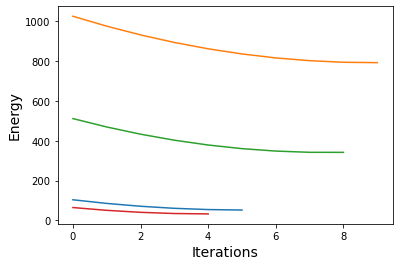

In [48]:
""" 
for 1:7 classes (j):
        pred2015.iloc[i][j]
        pred2016.iloc[i][j]
        pred2017.iloc[i][j]
        pred2018.iloc[i][j]
        
        for n times:
            2015
                optimise
            2016
                optimise
            2017
                optimise
            2018
                optimise
"""

# for 1:7 classes (j):

i=1
j=0

# initialise
rf2015 = pred2015.iloc[i][j]
rf2016 = pred2016.iloc[i][j]
rf2017 = pred2017.iloc[i][j]
rf2018 = pred2018.iloc[i][j]
print("RF-values:")
print(" 2015:", rf2015)
print(" 2016:", rf2016)
print(" 2017:", rf2017)
print(" 2018:", rf2018)

node2015 = rf2015
node2016 = rf2016
node2017 = rf2017
node2018 = rf2018

# for n times:
# node2015 = optimise_node2015(node2015, rf2015, edges = node2016)
# node2016 = optimise_node2016(node2016, rf2016, edges = (node2015, node2017))
# node2017 = optimise_node2017(node2017, rf2017, edges = (node2016, node2018))
# node2018 = optimise_node2018(node2018, rf2018, edges = node2017)

node2015, eSim2015 = optimise_node(node2015, edges=(rf2015,node2016), stepsize=1, plot=True)
node2016, eSim2016 = optimise_node(node2016, edges=(rf2016,node2015,node2017), stepsize=1, plot=True)
node2017, eSim2017 = optimise_node(node2017, edges=(rf2017,node2016,node2018), stepsize=1, plot=True)
node2018, eSim2018 = optimise_node(node2018, edges=(rf2018,node2017), stepsize=1, plot=True)

print("\nAfter minimising...")
print(" Energy 2015:", eSim2015)
print(" New node 2015:", node2015,"\n")
print(" Energy 2016:", eSim2016)
print(" New node 2016:", node2016,"\n")
print(" Energy 2017:", eSim2017)
print(" New node 2017:", node2017,"\n")
print(" Energy 2018:", eSim2018)
print(" New node 2018:", node2018,"\n")

In [8]:
edges = (rf2015, node2016)
edges
len(edges)

2

In [47]:
# optimise_node

def optimise_node(node, edges, stepsize=5, plot=False):

    # describe edges
    # 2 edges: rf2015 + node2016
    e = calc_energy(node, edges)
    
    # Create empty list to keep track of energy
    eSim = []
    eSim.append(e)
    #print("Initial Energy:", eSim[0])

    #print("Start simulation...")
    node, eSim = minimise_energy(node, edges, eSim, stepsize)
    #print("New node:", node)
    #print("Energy:", eSim)
    
    if plot==True:
        #print("Plotting energy")

        ys = eSim
        xs = [x for x in range(len(ys))]

        plt.plot(xs, ys)
        plt.ylabel('Energy', fontsize=14)
        plt.xlabel('Iterations', fontsize=14)
        #plt.xticks(np.arange(min(xs), max(xs)+1, 1.0))

        # Make sure to close the plt object once done
        #plt.close()
    
    return node, eSim

103.0590971774646
254.5771237429296
51.54107061199959
False
True
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


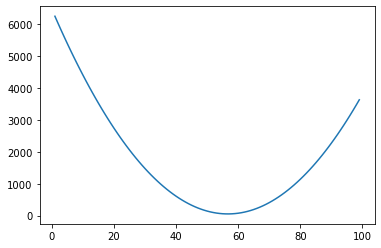

In [8]:
node = 61.7647058823529
edges = (rf2015, node2016)
print(calc_energy(node, edges))
print(calc_energy(node + 5, edges))
print(calc_energy(node - 5, edges))
i = 0
print(calc_energy(node + 5, edges) < eSim[i])
print(calc_energy(node - 5, edges) < eSim[i])

# Test plot energy vs 1:100
x = list(range(1,100))
print(x)
y = []
for i in x:
    e = calc_energy(i, edges)
    y.append(e)
plt.plot(x, y)

In [6]:
def calc_energy(node, edges):
    
    edge1 = edges[0]
    edge2 = edges[1]
    
    e1 = (node - edge1)**2
    e2 = (node - edge2)**2
    
    if len(edges) == 3:
        edge3 = edges[2]
        e3 = (node - edge3)**2
        return e1 + e2 + e3
    
    return e1 + e2


def minimise_energy(node, edges, eSim, stepsize):
    
    i = 0
    #print(i)
    
    if calc_energy(node + stepsize, edges) < eSim[i]:
        node = node + stepsize
        i += 1
        eSim.append(calc_energy(node, edges))
      
    elif calc_energy(node - stepsize, edges) < eSim[i]:
        node = node - stepsize
        i += 1
        eSim.append(calc_energy(node, edges))
    
    return node, eSim

In [33]:
# Try to expand minimise energy function with while loop

def minimise_energy(node, edges, eSim, stepsize):
    
    i = 0
    #print(i)
    
    if calc_energy(node + stepsize, edges) < eSim[i]:
        node = node + stepsize
        i += 1
        eSim.append(calc_energy(node, edges))
        
        while calc_energy(node + stepsize, edges) < eSim[i]:
            node = node + stepsize
            i += 1
            eSim.append(calc_energy(node,edges))
        
    elif calc_energy(node - stepsize, edges) < eSim[i]:
        node = node - stepsize
        i += 1
        eSim.append(calc_energy(node, edges))
        
        while calc_energy(node - stepsize, edges) < eSim[i]:
            node = node - stepsize
            i += 1
            eSim.append(calc_energy(node, edges))
    
    return node, eSim

In [ ]:
## Old below:

In [14]:
def initialise(lcClass=None):
    
    node = lcClass[0]
    node2016 = lcClass[1]
    node2017 = lcClass[2]
    node2018 = lcClass[3]

    print("Node:", node)
    edgeUnary = tree[0]
    edgeNextYear = tree[1]
    
    return node, edgeUnary, edgeNextYear

def node_energy(node):
    
    # Squared-difference
    energyUnary = (node - edgeUnary)**2
    energyNextYear = (node - edgeNextYear)**2

    #print(energyUnary)
    #print(energyNextYear)

    # Energy
    energyTotal = energyUnary + energyNextYear
    #print("Total energy:", energyTotal)
    
    return(energyTotal)

In [19]:
# Intialise elements
start_node, edgeUnary, edgeNextYear =  initialise(tree)
energyTotal = node_energy(start_node)

# Create empty list to keep track of energy
energySim = []
energySim.append(energyTotal)

# Counter
print("Initial Energy:", energySim[0])

# Start loop
print("---")
print("Start simulation...")
node, energySim = minimise_energy(start_node, energySim)
print("Energy:", energySim)
print("Final node:", node)

Node: 61.7647058823529
Initial Energy: 103.0590971774646
---
Start simulation...
51.54107061199959
Here
2 100.02304404653458
Made it
Energy: [103.0590971774646, 51.54107061199959, 100.02304404653458, 82.32664935962758, 68.63025467272058, 58.93385998581358, 53.237465298906585, 51.54107061199959, 53.84467592509258]
Final node: 57.7647058823529


In [83]:
start_node
node_energy(node+1)
node_energy(node+1) < energySim[2-1]

False

In [65]:
def minimise_energy(node, eSim):
    
    i = 0
    
    if node > 50:
        node = node - 5
        e = node_energy(node)
        print(e)
        energySim.append(e)
        i += 1

        while e < eSim[i-1]:
            print("Here")
            node = node - 5
            e = node_energy(node)
            eSim.append(e)
            i += 1
            print(i, e)
        
        if node_energy(node+1) < eSim[i]:
            print("Made it")
            node = node + 1
            e = node_energy(node)
            eSim.append(e)
            i += 1
            
            while e < eSim[i-1]:
                node = node + 1
                e = node_energy(node)
                eSim.append(e)
                i += 1
        
    else:
        node = node + 5
        e = node_energy(node)
        eSim.append(e)
        i += 1

        while e < eSim[i]:
            node = node + 5
            e = node_energy(node)
            eSim.append(e)
            i += 1
            
        if node_energy(node-1) < eSim[i]:
            print("Made it")
            node = node - 1
            e = node_energy(node)
            eSim.append(e)
            i += 1
            
            while e < eSim[i-1]:
                node = node - 1
                e = node_energy(node)
                eSim.append(e)
                i += 1

    return node, eSim

In [95]:
# Initialise 2016 node and edges

node = tree[1]
print(node)

edgeUnary = tree[1]
print(edgeUnary)
edgeNextYear = tree[2]
print(edgeNextYear)


51.6129032258064
51.6129032258064
20.0


In [96]:
# Describe edges of 2016

# Actual difference
#print(node - edgeUnary)
#print(node - edgeNextYear)

# Squared-difference
energyUnary = (node - edgeUnary)**2
energyNextYear = (node - edgeNextYear)**2


#print(energyUnary)
#print(energyNextYear)

# Energy
energySim = []
energyTotal = energyUnary + energyNextYear
print("Total energy:", energyTotal)
energySim.append(energyTotal)

# Counter
i = 0

Total energy: 999.3756503642006


In [97]:
energySim[i]


999.3756503642006

In [99]:
if node > 50:
    node = node - 5
    e = node_energy(node)
    #print(e)
    energySim.append(e)
    i += 1
    
    while e < energySim[i-1]:
        print(e, energySim[i-1])
        node = node - 5
        e = node_energy(node)
        energySim.append(e)
        i += 1
    
else:
    node = node + 5
    e = node_energy(node)
    energySim.append(e)
    i += 1
    
    while e < energySim[i]:
        node = node + 5
        e = node_energy(node)
        energySim.append(e)
        i += 1
    
#node
print(energySim)
print(node)

Total energy: 500.9885535900086
[999.3756503642006, 733.2466181061366, 567.1175858480726, 500.9885535900086, 534.8595213319446, 500.9885535900086]
36.6129032258064


999.3756503642006

In [67]:
def node_energy(node):
    
    # Squared-difference
    energyUnary = (node - edgeUnary)**2
    energyNextYear = (node - edgeNextYear)**2

    #print(energyUnary)
    #print(energyNextYear)

    # Energy
    energyTotal = energyUnary + energyNextYear
    print("Total energy:", energyTotal)
    
    return(energyTotal)

In [ ]:
def optimise_node2015(node2015, edges, plot=False):

    # describe edges
    # 2 edges: rf2015 + node2016
    e = calc_energy(node2015, edges)
    
    # Create empty list to keep track of energy
    eSim = []
    eSim.append(e)
    #print("Initial Energy:", eSim[0])

    #print("Start simulation...")
    node2015, eSim = minimise_energy(node2015, edges, eSim)
    #print("New node:", node2015)
    #print("Energy:", eSim)
    
    if plot==True:
        #print("Plotting energy")

        ys = eSim
        xs = [x for x in range(len(ys))]

        plt.plot(xs, ys)

        # Make sure to close the plt object once done
        #plt.close()
    
    return node2015, eSim
